In [1]:
from datetime import datetime

from pathlib import Path

import numpy as np
from scipy.stats import lognorm
import pandas as pd

from astropy import stats
import astropy.units as u
from astropy.io import fits
from astropy.visualization import hist

from matplotlib import style
style.use('ggplot')
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2
#%matplotlib widget

In [2]:
rootdir = Path("./data")
# use find to make this csv list
with open(rootdir / "2023.txt") as f:
    csvs = f.readlines()

# loop through the csv files and read them with pandas
frames = []
for csv in csvs:
    frames.append(pd.read_csv(rootdir / csv.rstrip()))

# now concat each frame into one big frame containing all of the data
data = pd.concat(frames)

In [3]:
g = data.groupby('wfs')
g.wfs.describe()

,count,unique,top,freq
wfs,,,,
binospec,54950,1,binospec,54950
f5,3236,1,f5,3236
mmirs,8687,1,mmirs,8687
newf9,435,1,newf9,435


In [4]:
# re-calculate the seeing using updated spot FWHM for binospec. filter out any NaN values...
#fixed_list = []
#for wfskey, group in g:
#    wfs = wfs_systems[wfskey]
#    group = g.get_group(wfskey)
#    #group.apply(seeing, axis=1, args=(wfs,))
#    group['fixed_raw_seeing'], group['fixed_seeing'] = seeing(group, wfs)
#    fixed_list.append(group)
#fixed = pd.concat(fixed_list)
#fixed.rename(index=str, columns={"seeing": "orig_seeing", "raw seeing": "orig_raw_seeing"}, inplace=True)
#fixed.rename(index=str, columns={"fixed_seeing": "seeing", "fixed_raw_seeing": "raw seeing"}, inplace=True)
fixed = data[np.isfinite(data['seeing'])]
fixed = fixed[fixed['fwhm'] > 0.]
fixed = fixed[fixed['seeing'] > 0.]
fixed = fixed[fixed['seeing'] < 4.]
#fixed = fixed[fixed['time'] < "2020-12-31"]

In [5]:
fixed.sort_values(by='time')

,time,wfs,file,exptime,airmass,az,el,osst,outt,chamt,...,focerr,cc_x_err,cc_y_err,xcen,ycen,seeing,raw_seeing,fwhm,wavefront_rms,residual_rms
0,2023-01-01T01:24:33.125000,f5,f5wfs_20221231-182505.fits,30.0,1.2672,100.467994,52.108014,6.2,5.4,5.946,...,13.57,3.681,13.801,268.004159,245.999190,2.530205,2.916505,14.588108,976.647407,1594.829740
1,2023-01-01T01:26:18.291000,f5,f5wfs_20221231-182651.fits,30.0,1.2609,100.784441,52.474918,5.1,5.0,5.841,...,-71.01,-0.000,-1.232,251.996040,262.999717,2.495413,2.867813,14.388929,1855.675196,1510.773735
2,2023-01-01T01:27:15.976000,f5,f5wfs_20221231-182748.fits,30.0,1.2574,100.965555,52.682725,5.7,4.9,5.778,...,-10.11,0.000,-7.112,251.001134,265.996267,2.351263,2.697648,13.688814,820.594895,1697.054262
4,2023-01-01T01:29:09.630000,f5,f5wfs_20221231-182942.fits,30.0,1.2508,101.318748,53.083694,6.1,5.3,5.945,...,-14.57,1.661,-11.179,250.996397,265.995922,2.346644,2.683861,13.631804,942.024227,2030.992465
5,2023-01-01T01:29:56.782000,f5,f5wfs_20221231-183034.fits,35.0,1.2479,101.475185,53.259411,5.8,5.3,6.026,...,-1.63,0.189,-3.586,246.994742,259.998963,2.426107,2.770881,13.990900,474.730433,1686.681386
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25,2023-12-31T11:50:50.485000,f5,f5wfs_20231231-045102.fits,10.0,1.0752,69.884890,68.447591,0.0,-1.1,-0.300,...,-32.06,-18.316,9.335,265.995566,245.008369,1.159294,1.210841,7.240234,1211.577550,1562.743097
26,2023-12-31T11:51:27.281000,f5,f5wfs_20231231-045139.fits,10.0,1.0743,69.848991,68.571831,0.0,-1.1,-0.400,...,17.63,-2.563,2.621,264.007656,246.994928,1.286689,1.343226,7.843422,617.221166,1621.958132
27,2023-12-31T12:55:36.309000,f5,f5wfs_20231231-055548.fits,10.0,1.0288,50.370951,76.403698,0.0,-1.4,-0.300,...,-40.06,-13.202,-3.236,269.996257,236.996231,1.432721,1.457338,8.358161,1395.799580,1740.634027
28,2023-12-31T12:56:11.181000,f5,f5wfs_20231231-055623.fits,10.0,1.0284,50.121527,76.496599,0.0,-1.3,-0.300,...,29.00,-0.000,-0.187,274.003177,250.005098,1.107692,1.126461,6.852342,892.881083,1897.996554


In [6]:
# create a date-time index so we can group and analyze the data by timestamps
fixed = fixed.set_index(pd.DatetimeIndex(fixed['time'], name='ut'))

<Figure size 800x500 with 0 Axes>

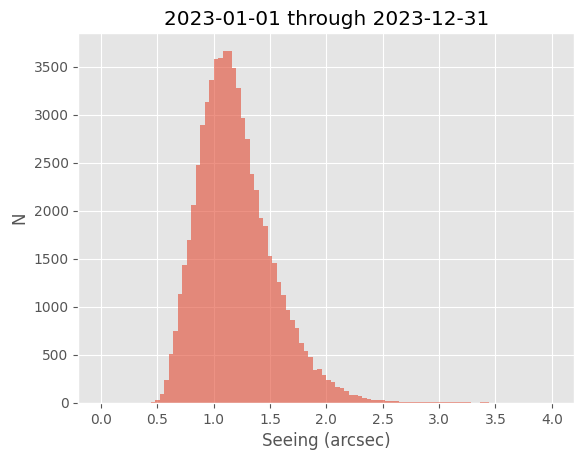

In [7]:
# make raw histogram of the zenith-corrected seeing column
fig = plt.figure(figsize=(8, 5))
fixed.hist(column='seeing', bins=100, range=(0.0, 4.0), alpha=0.6)
with plt.style.context('ggplot'):
    plt.title("2023-01-01 through 2023-12-31")
    plt.xlabel("Seeing (arcsec)")
    plt.ylabel("N")
plt.show()

In [8]:
# fit a log-normal distribution to the seeing data
sigma, loc, exp_mu = lognorm.fit(fixed['seeing'])
print(sigma, loc, exp_mu)
x = np.arange(0.0, 4.0, 0.01)
p = lognorm.pdf(x, sigma, loc=loc, scale=exp_mu)
mu = np.log(exp_mu)
mode = np.exp(mu - sigma**2) + loc
median = np.nanmedian(fixed['seeing'])
fit_median = exp_mu + loc

0.27138322517558355 0.005681417118624284 1.149327284060047


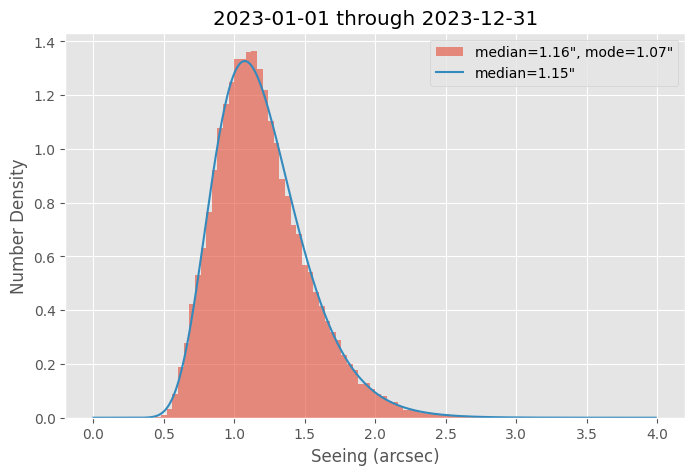

In [9]:
# plot normalized histogram with the fit and the median/mode calculated from the fit.
fig = plt.figure(figsize=(8, 5))
with plt.style.context('ggplot'):
    plt.hist(fixed['seeing'], density=True, bins=100, range=(0.0, 4.0), label="hist", alpha=0.6)
    logp = plt.plot(x, p, label="logp")
    plt.xlabel("Seeing (arcsec)")
    plt.ylabel("Number Density")
    plt.title("2023-01-01 through 2023-12-31")
    plt.legend(["median=%.2f\", mode=%.2f\"" % (fit_median, mode), "median=%.2f\"" % (
        median
    )])
    plt.savefig("2023_allyear.png")
plt.show()

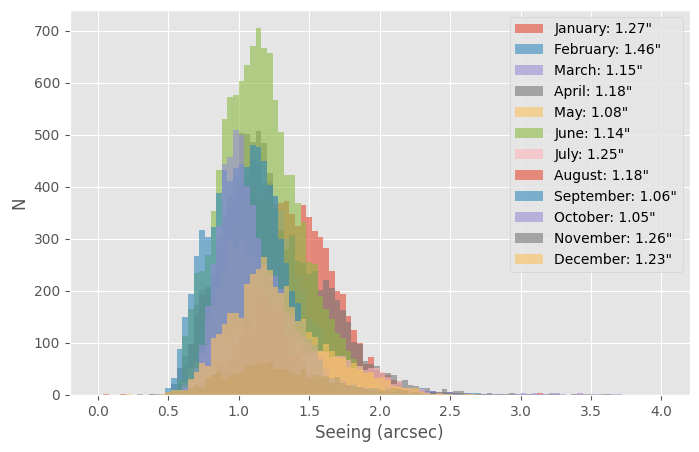

In [10]:
# panda time indexing makes it easy to group by month
fig = plt.figure(figsize=(8, 5))
months = {}
legends = []
months['January'] = fixed.loc['2023-01']
months['February'] = fixed.loc['2023-02']
months['March'] = fixed.loc['2023-03']
months['April'] = fixed.loc['2023-04']
months['May'] = fixed.loc['2023-05']
months['June'] = fixed.loc['2023-06']
months['July'] = fixed.loc['2023-07']
months['August'] = fixed.loc['2023-08']
months['September'] = fixed.loc['2023-09']
months['October'] = fixed.loc['2023-10']
months['November'] = fixed.loc['2023-11']
months['December'] = fixed.loc['2023-12']
for m in months:
    plt.hist(months[m]['seeing'], bins=100, range=(0.0, 4.0), label=m, alpha=0.6)
    legend = "%s: %.2f\"" % (m, np.median(months[m]['seeing']))
    legends.append(legend)
plt.legend(legends)
plt.xlabel("Seeing (arcsec)")
plt.ylabel("N")
#plt.title("Data and median seeing values grouped by month")
plt.savefig("2023_monthly.png")
plt.show()

In [11]:
# now use the between_time() method to split the data into first and second halves of the night.
first_half = fixed.between_time(start_time='00:00', end_time='07:00')
second_half = fixed.between_time(start_time='07:00', end_time='14:00')
#first_half = months['December'].between_time(start_time='00:00', end_time='07:00')
#second_half = months['December'].between_time(start_time='07:00', end_time='14:00')
med_1st = np.median(first_half['seeing'])
med_2nd = np.median(second_half['seeing'])

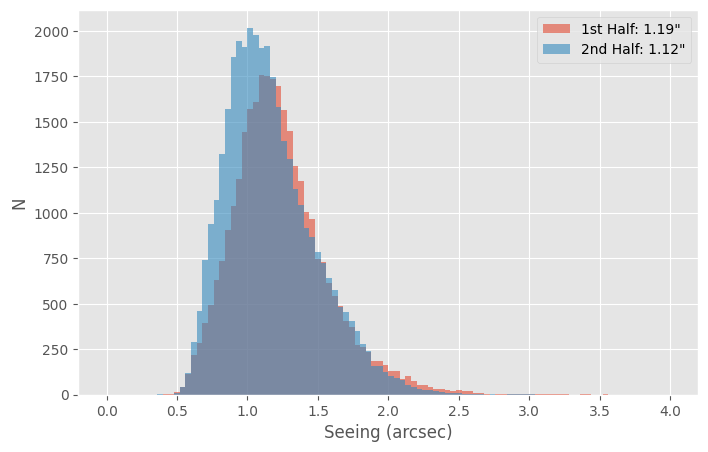

In [12]:
# plot the results and show that the seeing is better later in the night...
fig = plt.figure(figsize=(8, 5))
plt.hist(first_half['seeing'], bins=100, range=(0.0, 4.0), label="1st", alpha=0.6)
plt.hist(second_half['seeing'], bins=100, range=(0.0, 4.0), label="2nd", alpha=0.6)
plt.legend(["1st Half: %.2f\"" % med_1st, "2nd Half: %.2f\"" % med_2nd])
plt.xlabel("Seeing (arcsec)")
plt.ylabel("N")
#plt.title("Data and median seeing values grouped by half of the night")
plt.savefig("2023_1st2nd.png")
plt.show()

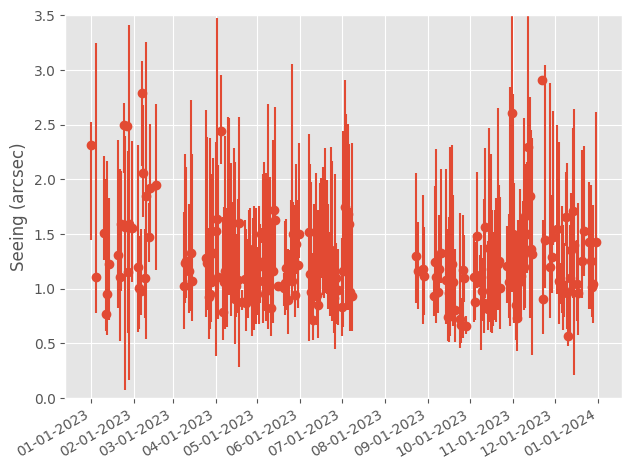

In [13]:
import matplotlib.dates as mdates

# make a new data frame that resamples the WFS data daily into the median, min, and max seeing for each day.
#fixed = fixed["2018-06-30":"2018-10-01"]
fig, ax = plt.subplots()
daily = pd.DataFrame()
daily['seeing'] = fixed.seeing.resample('D').median()
daily['max'] = fixed.seeing.resample('D').max()
daily['min'] = fixed.seeing.resample('D').min()
lowb = daily['seeing'] - daily['min']
upb = daily['max'] - daily['seeing']
plt.errorbar(daily.index, daily['seeing'], yerr=[lowb, upb], fmt='o')
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter("%m-%d-%Y"))
ax.set_ylim(0.0, 3.5)
fig.autofmt_xdate()
plt.tight_layout()
plt.ylabel("Seeing (arcsec)")
#plt.title("Nightly median seeing")
plt.savefig("2023_nightly.png")
plt.show()

In [14]:
date_list = list(daily.index.strftime('%Y-%m-%d'))
data = [np.array(fixed.loc[date]['seeing']) for date in date_list]
clean_data = {}
for d, arr in zip(date_list, data):
    if len(arr) > 0:
        clean_data[d] = arr
date_labels = [datetime.strptime(d, "%Y-%m-%d").date() for d in clean_data.keys()]

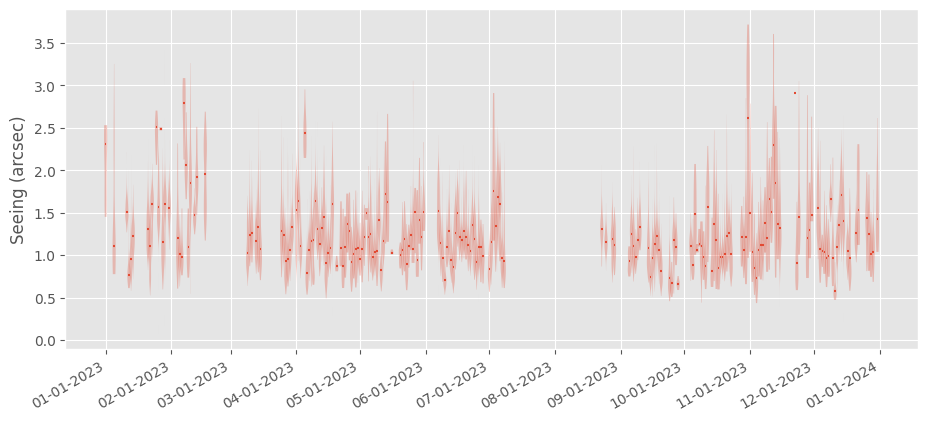

In [15]:
with plt.style.context('ggplot', after_reset=True):
    fig, ax = plt.subplots(figsize=(11,5))
    plt.violinplot(clean_data.values(), mdates.date2num(date_labels), points=50, widths=1.5,
                showextrema=False, showmedians=True, bw_method='silverman')

    ax.xaxis.set_major_locator(mdates.MonthLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter("%m-%d-%Y"))
    fig.autofmt_xdate()
    plt.ylabel("Seeing (arcsec)")
    plt.savefig("2023_violin.png")
    plt.show()

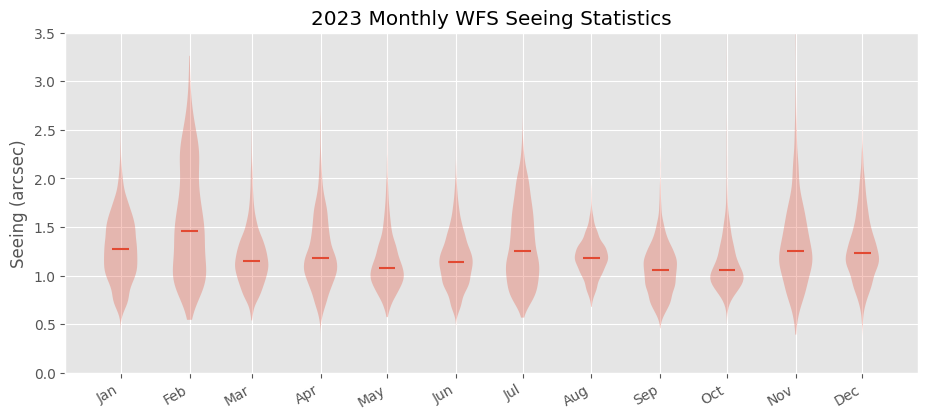

In [16]:
months = sorted(list(set(daily.index.strftime('%Y-%m'))))
mdata = [np.array(fixed.loc[month]['seeing']) for month in months]
clean_data = {}
for d, arr in zip(months, mdata):
    if len(arr) > 0:
        clean_data[d] = arr
date_labels = [datetime.strptime(d, "%Y-%m").date() for d in clean_data.keys()]

with plt.style.context('ggplot', after_reset=True):
    fig, ax = plt.subplots(figsize=(11,5))
    plt.violinplot(clean_data.values(), mdates.date2num(date_labels), points=100, widths=15,
                showextrema=False, showmedians=True, bw_method='silverman')

    ax.xaxis.set_major_locator(mdates.MonthLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter("%b"))
    ax.set_ylim(0.0, 3.5)
    fig.autofmt_xdate()
    plt.ylabel("Seeing (arcsec)")
    plt.savefig("2023_violin_monthly.png")
    plt.title("2023 Monthly WFS Seeing Statistics")
    plt.show()

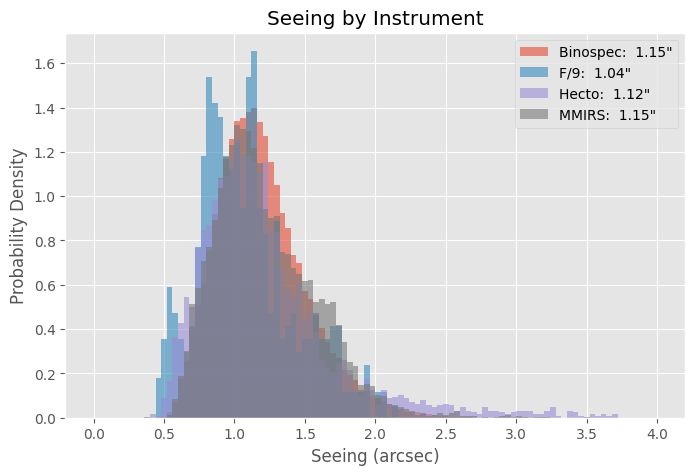

In [17]:
with plt.style.context('ggplot'):
    fig = plt.figure(figsize=(8, 5))
    medb = np.median(fixed['seeing'][fixed['wfs'] == 'binospec'])
    med9 = np.median(fixed['seeing'][fixed['wfs'] == 'newf9'])
    medf = np.median(fixed['seeing'][fixed['wfs'] == 'f5'])
    medm = np.median(fixed['seeing'][fixed['wfs'] == 'mmirs'])
    plt.hist(fixed['seeing'][fixed['wfs'] == 'binospec'], density=True, bins=100, range=(0.0, 4.), alpha=0.6, label=f"Binospec: {medb: .2f}\"")
    plt.hist(fixed['seeing'][fixed['wfs'] == 'newf9'], density=True, bins=100, range=(0.0, 4.), alpha=0.6, label=f"F/9: {med9: .2f}\"")
    plt.hist(fixed['seeing'][fixed['wfs'] == 'f5'], density=True, bins=100, range=(0.0, 4.), alpha=0.6, label=f"Hecto: {medf: .2f}\"")
    plt.hist(fixed['seeing'][fixed['wfs'] == 'mmirs'], density=True, bins=100, range=(0.0, 4.), alpha=0.6, label=f"MMIRS: {medm: .2f}\"")
    plt.legend()
    plt.title("Seeing by Instrument")
    plt.xlabel("Seeing (arcsec)")
    plt.ylabel("Probability Density")
plt.savefig("per_instrument_2023.png")
plt.show()

In [18]:
from minicyclop.io import read_seeing_data

In [19]:
cyclop = read_seeing_data(Path.home() / "MMT/minicyclop/data/MiniCyclop/Data/Seeing_Data.txt")

In [20]:
cyclop

,UT,flux,seeing,r0,isot,epoch_ms
ut,,,,,,
2022-06-08 03:32:32,6/8/2022 3:32:32 AM,2733.7,0.84,135.8,2022-06-08T03:32:32.968,1654659152968
2022-06-08 03:33:27,6/8/2022 3:33:27 AM,2755.7,0.84,134.4,2022-06-08T03:33:27.409,1654659207408
2022-06-08 03:34:23,6/8/2022 3:34:23 AM,2801.6,2.38,47.7,2022-06-08T03:34:23.655,1654659263655
2022-06-08 03:35:16,6/8/2022 3:35:16 AM,2853.2,1.01,112.3,2022-06-08T03:35:16.325,1654659316324
2022-06-08 03:36:00,6/8/2022 3:36:00 AM,2739.0,1.03,110.7,2022-06-08T03:36:00.691,1654659360691
...,...,...,...,...,...,...
2024-02-18 04:33:52,2/18/2024 4:33:52 AM,641.7,0.99,114.9,2024-02-18T04:33:52.373,1708230832372
2024-02-18 04:35:07,2/18/2024 4:35:07 AM,654.0,0.99,114.6,2024-02-18T04:35:07.973,1708230907972
2024-02-18 04:36:28,2/18/2024 4:36:28 AM,601.0,1.03,110.5,2024-02-18T04:36:28.385,1708230988385


In [21]:
cyclop_2023 = cyclop[(cyclop.index >= '2023-01-01') & (cyclop.index < '2024-01-01')]

In [22]:
cyclop_2022 = cyclop[(cyclop.index >= '2022-01-01') & (cyclop.index < '2023-01-01')]

0.5527209829067455 0.428711044903738 0.6425676779911087


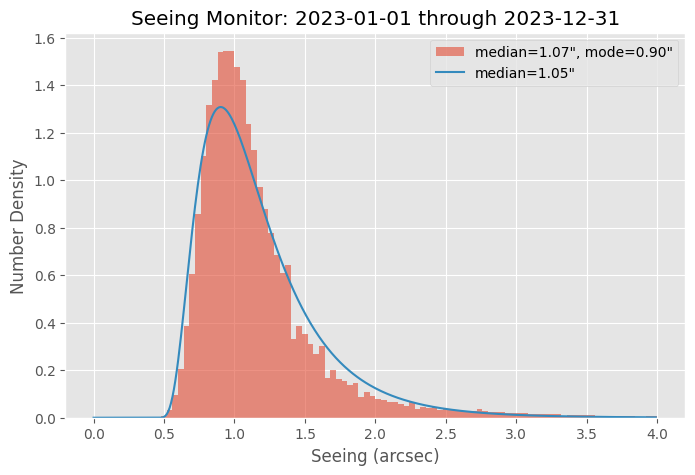

In [25]:
# fit a log-normal distribution to the seeing data
sigma, loc, exp_mu = lognorm.fit(cyclop_2023['seeing'])
print(sigma, loc, exp_mu)
x = np.arange(0.0, 4.0, 0.01)
p = lognorm.pdf(x, sigma, loc=loc, scale=exp_mu)
mu = np.log(exp_mu)
mode = np.exp(mu - sigma**2) + loc
median = np.nanmedian(cyclop_2023['seeing'])
fit_median = exp_mu + loc

# plot normalized histogram with the fit and the median/mode calculated from the fit.
fig = plt.figure(figsize=(8, 5))
with plt.style.context('ggplot'):
    plt.hist(cyclop_2023['seeing'], density=True, bins=100, range=(0.0, 4.0), label="hist", alpha=0.6)
    logp = plt.plot(x, p, label="logp")
    plt.xlabel("Seeing (arcsec)")
    plt.ylabel("Number Density")
    plt.title("Seeing Monitor: 2023-01-01 through 2023-12-31")
    plt.legend(["median=%.2f\", mode=%.2f\"" % (fit_median, mode), "median=%.2f\"" % (
        median
    )])
    plt.savefig("2023_cyclop_hist.png")
plt.show()

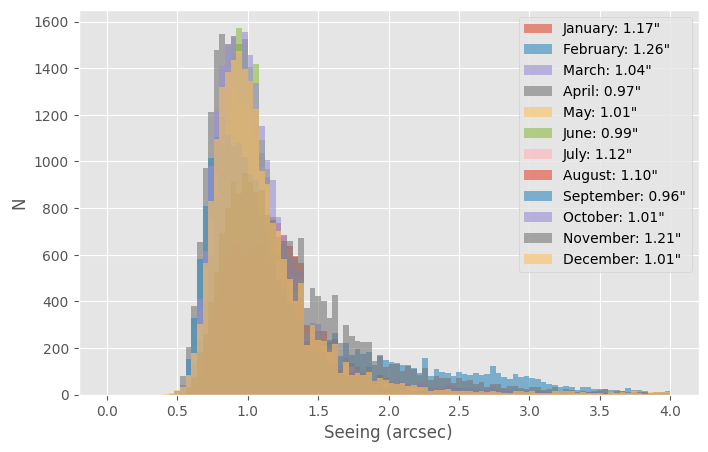

In [28]:
# panda time indexing makes it easy to group by month
fig = plt.figure(figsize=(8, 5))
cyc_months = {}
legends = []
cyc_months['January'] = cyclop_2023.loc['2023-01']
cyc_months['February'] = cyclop_2023.loc['2023-02']
cyc_months['March'] = cyclop_2023.loc['2023-03']
cyc_months['April'] = cyclop_2023.loc['2023-04']
cyc_months['May'] = cyclop_2023.loc['2023-05']
cyc_months['June'] = cyclop_2023.loc['2023-06']
cyc_months['July'] = cyclop_2023.loc['2023-07']
cyc_months['August'] = cyclop_2023.loc['2023-08']
cyc_months['September'] = cyclop_2023.loc['2023-09']
cyc_months['October'] = cyclop_2023.loc['2023-10']
cyc_months['November'] = cyclop_2023.loc['2023-11']
cyc_months['December'] = cyclop_2023.loc['2023-12']
for m in cyc_months.keys():
    plt.hist(cyc_months[m]['seeing'], bins=100, range=(0.0, 4.0), label=m, alpha=0.6)
    legend = "%s: %.2f\"" % (m, np.median(cyc_months[m]['seeing']))
    legends.append(legend)
plt.legend(legends)
plt.xlabel("Seeing (arcsec)")
plt.ylabel("N")
#plt.title("Data and median seeing values grouped by month")
plt.savefig("2023_cyclop_monthly.png")
plt.show()

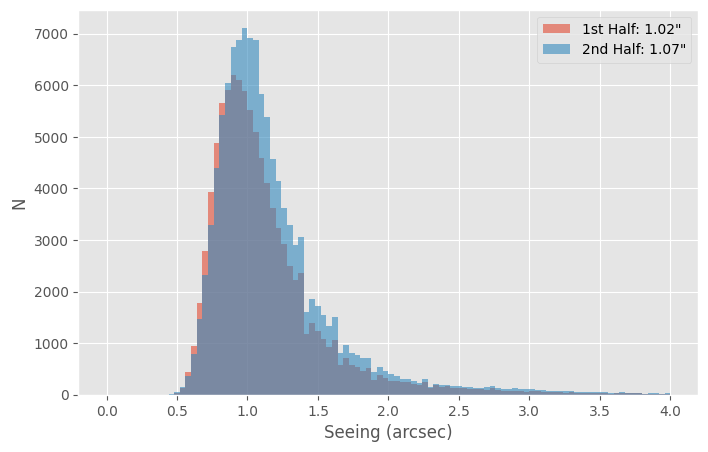

In [29]:
# now use the between_time() method to split the data into first and second halves of the night.
first_half = cyclop_2023.between_time(start_time='00:00', end_time='07:00')
second_half = cyclop_2023.between_time(start_time='07:00', end_time='14:00')
#first_half = months['December'].between_time(start_time='00:00', end_time='07:00')
#second_half = months['December'].between_time(start_time='07:00', end_time='14:00')
med_1st = np.median(first_half['seeing'])
med_2nd = np.median(second_half['seeing'])

# plot the results and show that the seeing is better later in the night...
fig = plt.figure(figsize=(8, 5))
plt.hist(first_half['seeing'], bins=100, range=(0.0, 4.0), label="1st", alpha=0.6)
plt.hist(second_half['seeing'], bins=100, range=(0.0, 4.0), label="2nd", alpha=0.6)
plt.legend(["1st Half: %.2f\"" % med_1st, "2nd Half: %.2f\"" % med_2nd])
plt.xlabel("Seeing (arcsec)")
plt.ylabel("N")
#plt.title("Data and median seeing values grouped by half of the night")
plt.savefig("2023_cyclop_1st2nd.png")
plt.show()

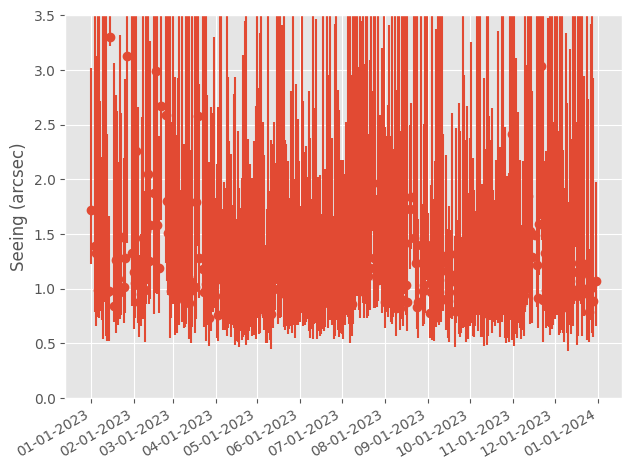

In [30]:
# make a new data frame that resamples the WFS data daily into the median, min, and max seeing for each day.
#fixed = fixed["2018-06-30":"2018-10-01"]
fig, ax = plt.subplots()
daily = pd.DataFrame()
daily['seeing'] = cyclop_2023.seeing.resample('D').median()
daily['max'] = cyclop_2023.seeing.resample('D').max()
daily['min'] = cyclop_2023.seeing.resample('D').min()
lowb = daily['seeing'] - daily['min']
upb = daily['max'] - daily['seeing']
plt.errorbar(daily.index, daily['seeing'], yerr=[lowb, upb], fmt='o')
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter("%m-%d-%Y"))
ax.set_ylim(0.0, 3.5)
fig.autofmt_xdate()
plt.tight_layout()
plt.ylabel("Seeing (arcsec)")
#plt.title("Nightly median seeing")
plt.savefig("2023_cyclop_plot_monthly.png")
plt.show()

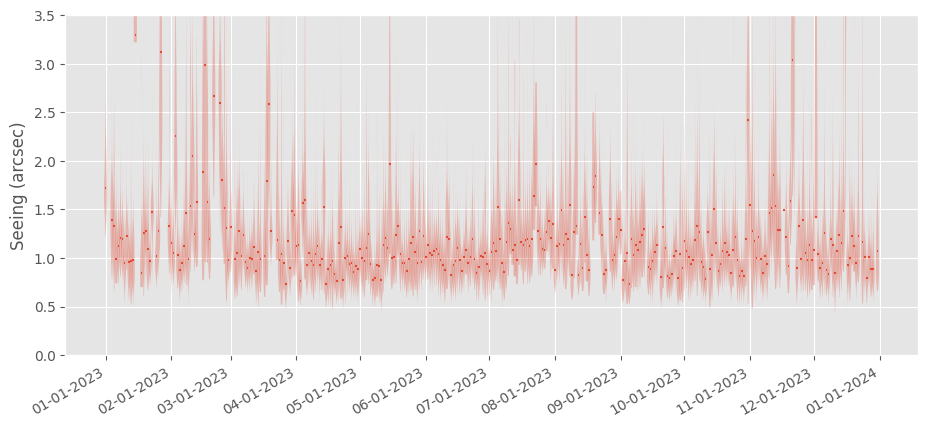

In [31]:
date_list = list(daily.index.strftime('%Y-%m-%d'))
data = [np.array(cyclop_2023.loc[date]['seeing']) for date in date_list]
clean_data = {}
for d, arr in zip(date_list, data):
    if len(arr) > 0:
        clean_data[d] = arr
date_labels = [datetime.strptime(d, "%Y-%m-%d").date() for d in clean_data.keys()]

with plt.style.context('ggplot', after_reset=True):
    fig, ax = plt.subplots(figsize=(11,5))
    plt.violinplot(clean_data.values(), mdates.date2num(date_labels), points=50, widths=1.5,
                showextrema=False, showmedians=True, bw_method='silverman')

    ax.xaxis.set_major_locator(mdates.MonthLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter("%m-%d-%Y"))
    ax.set_ylim(0.0, 3.5)
    fig.autofmt_xdate()
    plt.ylabel("Seeing (arcsec)")
    plt.savefig("2023_cyclop_violin.png")
    plt.show()

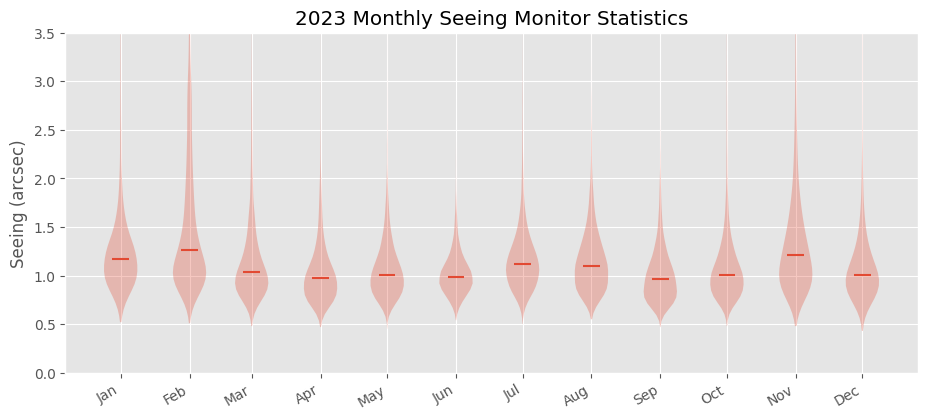

In [32]:
months = sorted(list(set(daily.index.strftime('%Y-%m'))))
mdata = [np.array(cyclop_2023.loc[month]['seeing']) for month in months]
clean_data = {}
for d, arr in zip(months, mdata):
    if len(arr) > 0:
        clean_data[d] = arr
date_labels = [datetime.strptime(d, "%Y-%m").date() for d in clean_data.keys()]

with plt.style.context('ggplot', after_reset=True):
    fig, ax = plt.subplots(figsize=(11,5))
    plt.violinplot(clean_data.values(), mdates.date2num(date_labels), points=100, widths=15,
                showextrema=False, showmedians=True, bw_method='silverman')

    ax.xaxis.set_major_locator(mdates.MonthLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter("%b"))
    ax.set_ylim(0.0, 3.5)
    fig.autofmt_xdate()
    plt.ylabel("Seeing (arcsec)")
    plt.savefig("2023_cyclop_violin_monthly.png")
    plt.title("2023 Monthly Seeing Monitor Statistics")
    plt.show()

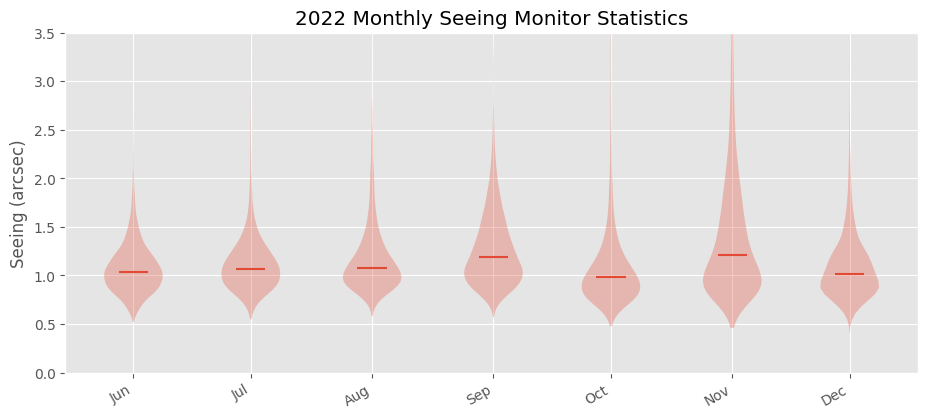

In [33]:
months = sorted(list(set(cyclop_2022.index.strftime('%Y-%m'))))
mdata = [np.array(cyclop_2022.loc[month]['seeing']) for month in months]
clean_data = {}
for d, arr in zip(months, mdata):
    if len(arr) > 0:
        clean_data[d] = arr
date_labels = [datetime.strptime(d, "%Y-%m").date() for d in clean_data.keys()]

with plt.style.context('ggplot', after_reset=True):
    fig, ax = plt.subplots(figsize=(11,5))
    plt.violinplot(clean_data.values(), mdates.date2num(date_labels), points=100, widths=15,
                showextrema=False, showmedians=True, bw_method='silverman')

    ax.xaxis.set_major_locator(mdates.MonthLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter("%b"))
    ax.set_ylim(0.0, 3.5)
    fig.autofmt_xdate()
    plt.ylabel("Seeing (arcsec)")
    plt.savefig("2022_cyclop_violin_monthly.png")
    plt.title("2022 Monthly Seeing Monitor Statistics")
    plt.show()

In [34]:
f9 = fixed[fixed['wfs'] == 'newf9']
bino = fixed[fixed['wfs'] == 'binospec']
hecto = fixed[fixed['wfs'] == 'f5']
mmirs = fixed[fixed['wfs'] == 'mmirs']

In [35]:
f9_dates = sorted(list(set(f9.index.strftime('%Y-%m-%d'))))
bino_dates = sorted(list(set(bino.index.strftime('%Y-%m-%d'))))
hecto_dates = sorted(list(set(hecto.index.strftime('%Y-%m-%d'))))
mmirs_dates = sorted(list(set(mmirs.index.strftime('%Y-%m-%d'))))
bino_dates, hecto_dates, f9_dates, mmirs_dates

(['2023-01-11',
  '2023-01-12',
  '2023-01-13',
  '2023-01-14',
  '2023-01-21',
  '2023-01-22',
  '2023-01-23',
  '2023-01-25',
  '2023-01-26',
  '2023-01-27',
  '2023-01-28',
  '2023-01-29',
  '2023-01-31',
  '2023-02-17',
  '2023-03-09',
  '2023-03-10',
  '2023-03-11',
  '2023-03-13',
  '2023-03-14',
  '2023-03-15',
  '2023-03-25',
  '2023-03-26',
  '2023-03-27',
  '2023-03-28',
  '2023-03-29',
  '2023-03-30',
  '2023-04-12',
  '2023-04-13',
  '2023-04-14',
  '2023-04-15',
  '2023-04-16',
  '2023-04-17',
  '2023-04-18',
  '2023-06-07',
  '2023-06-08',
  '2023-06-09',
  '2023-06-10',
  '2023-06-11',
  '2023-06-12',
  '2023-06-13',
  '2023-06-14',
  '2023-06-15',
  '2023-06-16',
  '2023-06-17',
  '2023-06-18',
  '2023-06-19',
  '2023-06-20',
  '2023-06-21',
  '2023-06-22',
  '2023-06-23',
  '2023-06-24',
  '2023-06-25',
  '2023-06-26',
  '2023-07-04',
  '2023-07-05',
  '2023-07-06',
  '2023-07-07',
  '2023-07-08',
  '2023-08-23',
  '2023-08-25',
  '2023-08-28',
  '2023-08-29',
  '2023-

In [36]:
cyc_f9 = np.hstack([np.array(cyclop_2023.loc[date]['seeing']) for date in f9_dates])
cyc_bino = np.hstack([np.array(cyclop_2023.loc[date]['seeing']) for date in bino_dates])
cyc_hecto = np.hstack([np.array(cyclop_2023.loc[date]['seeing']) for date in hecto_dates])
cyc_mmirs = np.hstack([np.array(cyclop_2023.loc[date]['seeing']) for date in mmirs_dates])

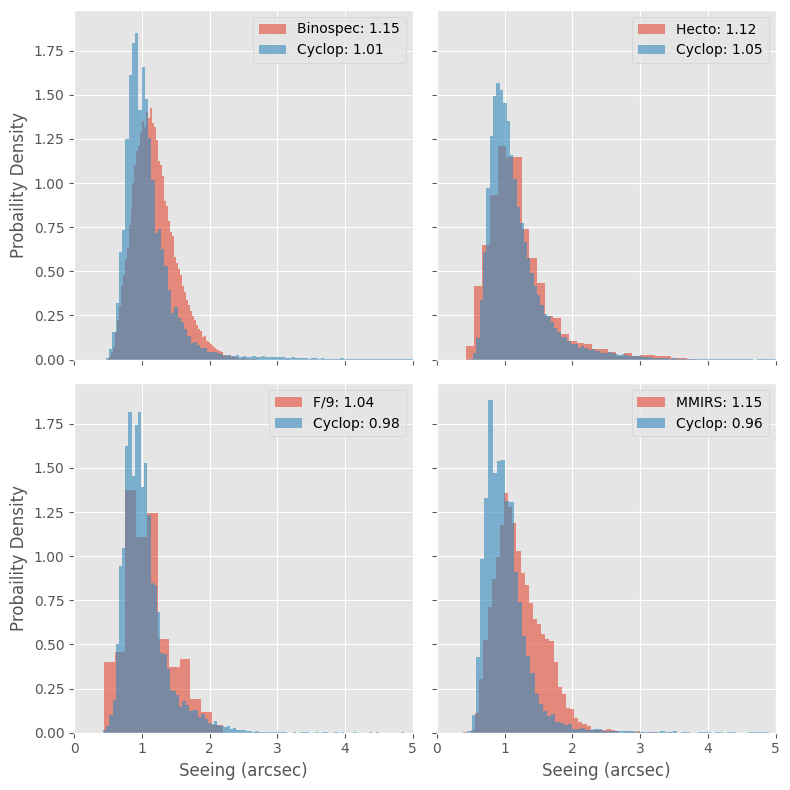

In [37]:
with plt.style.context('ggplot', after_reset=True):
    fig, ax = plt.subplots(2, 2, figsize=(8, 8), sharex=True, sharey=True)
    ax = ax.flat
    fig.subplots_adjust(hspace=0)

    hist(bino['seeing'], bins='scott', ax=ax[0], histtype='stepfilled', alpha=0.6, density=True)
    hist(cyc_bino, bins='scott', ax=ax[0], histtype='stepfilled', alpha=0.6, density=True)
    ax[0].legend([f"Binospec: {np.median(bino['seeing']):.2f}", f"Cyclop: {np.median(cyc_bino):.2f}"])
    ax[0].set_ylabel("Probaility Density")
    ax[0].set_xlim(0, 5)

    hist(hecto['seeing'], bins='scott', ax=ax[1], histtype='stepfilled', alpha=0.6, density=True)
    hist(cyc_hecto, bins='scott', ax=ax[1], histtype='stepfilled', alpha=0.6, density=True)
    ax[1].legend([f"Hecto: {np.median(hecto['seeing']):.2f}", f"Cyclop: {np.median(cyc_hecto):.2f}"])
    ax[1].set_xlim(0, 5)

    hist(f9['seeing'], bins='scott', ax=ax[2], histtype='stepfilled', alpha=0.6, density=True)
    hist(cyc_f9, bins='scott', ax=ax[2], histtype='stepfilled', alpha=0.6, density=True)
    ax[2].legend([f"F/9: {np.median(f9['seeing']):.2f}", f"Cyclop: {np.median(cyc_f9):.2f}"])
    ax[2].set_xlim(0, 5)
    ax[2].set_xlabel("Seeing (arcsec)")
    ax[2].set_ylabel("Probaility Density")

    hist(mmirs['seeing'], bins='scott', ax=ax[3], histtype='stepfilled', alpha=0.6, density=True)
    hist(cyc_mmirs, bins='scott', ax=ax[3], histtype='stepfilled', alpha=0.6, density=True)
    ax[3].legend([f"MMIRS: {np.median(mmirs['seeing']):.2f}", f"Cyclop: {np.median(cyc_mmirs):.2f}"])
    ax[3].set_xlim(0, 5)
    ax[3].set_xlabel("Seeing (arcsec)")

    plt.tight_layout()
    plt.savefig("2023_cyclop_vs_inst.png")
    plt.show()